## Points and locations
The equations of motion of the system requires the mass center of each rigid body. First, we define the points that locate the 4 joints of the system, i.e.:
- Ground joint;
- Lower arm joint;
- Upper arm joint;
- Hand joint.

In [52]:
from reference_frame_solution import * # Importing the output of reference-frame file
from sympy.physics.mechanics import Point, dynamicsymbols
from sympy import symbols, simplify
from IPython.display import Image

In [3]:
ground_joint, lower_arm_joint, upper_arm_joint, hand_joint = Point('G'), Point('L'), Point('U'), Point('H')

In order to relate two different points, the lengths need to be specified.

In [4]:
lower_arm_length, upper_arm_length, hand_length, finger1_length, finger2_length = symbols('l_L, l_U, l_H, l_F1, l_F2')

As the ground joint is the base point, which is fixed on the inertial frame and has zero velocity, all the other points will be defined with respect to this point. For instance, the lower arm joint is defined with a vector that is the length from the ground joint to the lower arm joint (`lower_arm_length` variable) in the direction of the lower leg `y'` unit vector (axis). For this, the reference point and vector will be inputed in `Point.set_pos` method.

In [43]:
lower_arm_joint.set_pos(ground_joint, lower_arm_length * lower_arm_frame.y)
upper_arm_joint.set_pos(lower_arm_joint, upper_arm_length * upper_arm_frame.y)
hand_joint.set_pos(upper_arm_joint, hand_length * hand_frame.y)

The points positions can be expressed with the unit vectors of the reference frames, as seen below.

Note that `l` is the unit vector in the axis direction (length) of the lower arm, `u` is the unit vector in the axis direction of the upper arm and `h` is the unit vector in the axis direction of the hand.

In [47]:
lower_arm_joint.pos_from(ground_joint) # Lower arm joint

l_L*L.y

In [48]:
upper_arm_joint.pos_from(ground_joint) # Upper arm joint

l_L*L.y + l_U*U.y

In [49]:
hand_joint.pos_from(ground_joint) # Hand joint

l_L*L.y + l_U*U.y + l_H*H.y

The points position can be expressed with respect to another point with `Point.pos_from` method:

Note: Remember that the unit vector `x`, represented by `ix`, points to your LHS, while the `y` unit vector points upwards.

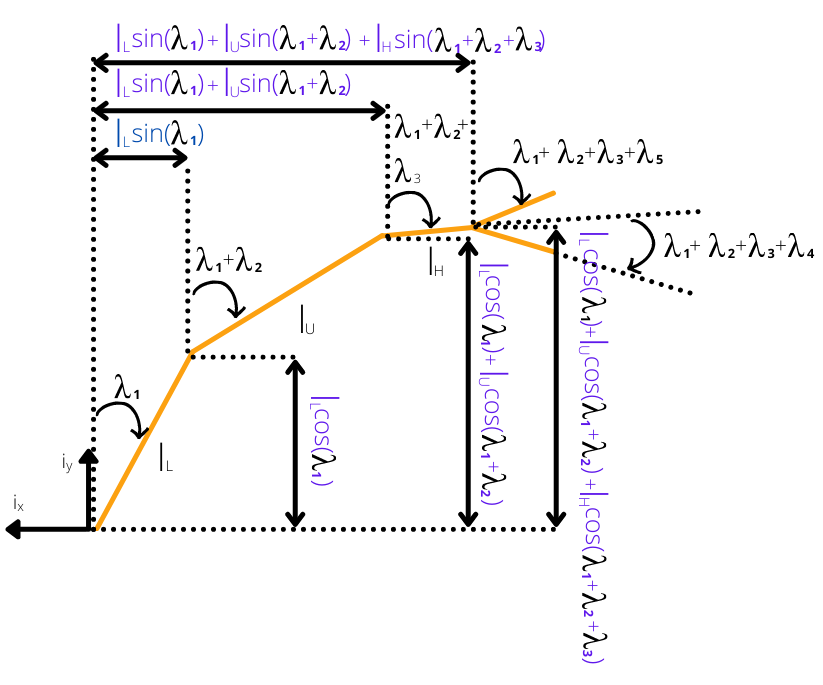

In [53]:
Image('https://user-images.githubusercontent.com/60149913/105637192-83fa3f00-5e42-11eb-82cb-71fd7e484ee6.png')

In [51]:
hand_joint.pos_from(ground_joint).express(inertial_frame).simplify()

(-l_H*sin(lambda1 + lambda2 + lambda3) - l_L*sin(lambda1) - l_U*sin(lambda1 + lambda2))*I.x + (l_H*cos(lambda1 + lambda2 + lambda3) + l_L*cos(lambda1) + l_U*cos(lambda1 + lambda2))*I.y